In [1]:
from pytximport import tximport
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns  
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
files = [
    "../salmon_output/D1_killers/quant.sf",
   "../salmon_output/D1_nonkillers/quant.sf"]

samples = ["D1_killers","D1_nonkillers"]

In [3]:
conditions = [
    "kill",
    "non_kill",
    # Add conditions corresponding to each sample
]

In [4]:
txi = tximport(
    files,
    "salmon",
    counts_from_abundance="scaled_tpm",
    return_transcript_data=True,
)

Reading quantification files: 2it [00:00,  5.24it/s]


In [5]:
df = pd.DataFrame(txi.X, index=txi.obs_names, columns=txi.var_names)

In [6]:
transposed_df = df.T

In [13]:
transposed_df.rename(columns={'../salmon_output/D1_killers/quant.sf':'D1_killers',
'../salmon_output/D1_nonkillers/quant.sf':'D1_nonkillers'},inplace=True)

In [14]:
transposed_df

,D1_killers,D1_nonkillers
ENST00000456328,0.000000,0.000000
ENST00000450305,0.000000,0.000000
ENST00000488147,20.372460,23.544310
ENST00000619216,0.000000,0.000000
ENST00000473358,0.000000,0.000000
...,...,...
ENST00000616361,1.082643,12.960672
ENST00000619109,0.000000,0.000000
ENST00000618083,0.000000,0.000000
ENST00000612315,2.131922,0.000000


In [15]:
counts_df = transposed_df.reset_index().melt(id_vars='index', var_name='condition', value_name='count')

In [16]:
counts_df

,index,condition,count
0,ENST00000456328,D1_killers,0.000000
1,ENST00000450305,D1_killers,0.000000
2,ENST00000488147,D1_killers,20.372460
3,ENST00000619216,D1_killers,0.000000
4,ENST00000473358,D1_killers,0.000000
...,...,...,...
413197,ENST00000616361,D1_nonkillers,12.960672
413198,ENST00000619109,D1_nonkillers,0.000000
413199,ENST00000618083,D1_nonkillers,0.000000
413200,ENST00000612315,D1_nonkillers,0.000000


In [17]:
from gtfparse import read_gtf

In [18]:
annotation = read_gtf("../bispecific/REF/genome.gtf")

In [19]:
print(type(annotation))

<class 'polars.dataframe.frame.DataFrame'>


In [20]:
annotation

seqname,source,feature,start,end,score,strand,frame,gene_id,gene_version,gene_name,gene_source,gene_biotype,transcript_id,transcript_version,transcript_name,transcript_source,transcript_biotype,tag,transcript_support_level,exon_number,exon_id,exon_version,protein_id,protein_version,ccds_id
cat,cat,cat,i64,i64,f32,cat,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""1""","""havana""","""gene""",11869,14409,null,"""+""",0,"""ENSG00000223972""","""5""","""DDX11L1""","""havana""","""transcribed_unprocessed_pseudo…","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""""""
"""1""","""havana""","""transcript""",11869,14409,null,"""+""",0,"""ENSG00000223972""","""5""","""DDX11L1""","""havana""","""transcribed_unprocessed_pseudo…","""ENST00000456328""","""2""","""DDX11L1-202""","""havana""","""processed_transcript""","""basic""","""1""","""""","""""","""""","""""","""""",""""""
"""1""","""havana""","""exon""",11869,12227,null,"""+""",0,"""ENSG00000223972""","""5""","""DDX11L1""","""havana""","""transcribed_unprocessed_pseudo…","""ENST00000456328""","""2""","""DDX11L1-202""","""havana""","""processed_transcript""","""basic""","""1""","""1""","""ENSE00002234944""","""1""","""""","""""",""""""
"""1""","""havana""","""transcript""",12010,13670,null,"""+""",0,"""ENSG00000223972""","""5""","""DDX11L1""","""havana""","""transcribed_unprocessed_pseudo…","""ENST00000450305""","""2""","""DDX11L1-201""","""havana""","""transcribed_unprocessed_pseudo…","""basic""","""NA""","""""","""""","""""","""""","""""",""""""
"""1""","""havana""","""exon""",12010,12057,null,"""+""",0,"""ENSG00000223972""","""5""","""DDX11L1""","""havana""","""transcribed_unprocessed_pseudo…","""ENST00000450305""","""2""","""DDX11L1-201""","""havana""","""transcribed_unprocessed_pseudo…","""basic""","""NA""","""1""","""ENSE00001948541""","""1""","""""","""""",""""""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Y""","""havana""","""exon""",26633345,26633431,null,"""-""",0,"""ENSG00000237917""","""1""","""PARP4P1""","""havana""","""unprocessed_pseudogene""","""ENST00000435945""","""1""","""PARP4P1-201""","""havana""","""unprocessed_pseudogene""","""basic""","""NA""","""2""","""ENSE00001638296""","""1""","""""","""""",""""""
"""Y""","""havana""","""exon""",26634523,26634652,null,"""-""",0,"""ENSG00000237917""","""1""","""PARP4P1""","""havana""","""unprocessed_pseudogene""","""ENST00000435945""","""1""","""PARP4P1-201""","""havana""","""unprocessed_pseudogene""","""basic""","""NA""","""1""","""ENSE00001797328""","""1""","""""","""""",""""""
"""Y""","""havana""","""gene""",56855244,56855488,null,"""+""",0,"""ENSG00000235857""","""1""","""CTBP2P1""","""havana""","""processed_pseudogene""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""","""""",""""""


In [21]:
annotation.write_csv("output.csv")

In [22]:
output = pd.read_csv("/work/talisman/sthakur/Differential_isoform_analysis/output.csv")

/tmp/ipykernel_141029/248276588.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  output = pd.read_csv("/work/talisman/sthakur/Differential_isoform_analysis/output.csv")


In [23]:
filtered_df = pd.DataFrame(output,columns=['gene_name','transcript_id','transcript_name'])

In [30]:
filtered_df

,gene_name,transcript_id,transcript_name
0,DDX11L1,NaN,NaN
1,DDX11L1,ENST00000456328,DDX11L1-202
2,DDX11L1,ENST00000456328,DDX11L1-202
3,DDX11L1,ENST00000450305,DDX11L1-201
4,DDX11L1,ENST00000450305,DDX11L1-201
...,...,...,...
2737554,PARP4P1,ENST00000435945,PARP4P1-201
2737555,PARP4P1,ENST00000435945,PARP4P1-201
2737556,CTBP2P1,NaN,NaN
2737557,CTBP2P1,ENST00000431853,CTBP2P1-201


In [38]:
counts_df = counts_df.rename(columns={'index': 'transcript_id'})

In [39]:
counts_df

,transcript_id,condition,count
0,ENST00000456328,D1_killers,0.000000
1,ENST00000450305,D1_killers,0.000000
2,ENST00000488147,D1_killers,20.372460
3,ENST00000619216,D1_killers,0.000000
4,ENST00000473358,D1_killers,0.000000
...,...,...,...
413197,ENST00000616361,D1_nonkillers,12.960672
413198,ENST00000619109,D1_nonkillers,0.000000
413199,ENST00000618083,D1_nonkillers,0.000000
413200,ENST00000612315,D1_nonkillers,0.000000


In [46]:
merged_df = pd.merge(counts_df, filtered_df, on='transcript_id', how='left')

In [49]:
merged_df.head()

,transcript_id,condition,count,gene_name,transcript_name
0,ENST00000456328,D1_killers,0.0,DDX11L1,DDX11L1-202
1,ENST00000456328,D1_killers,0.0,DDX11L1,DDX11L1-202
2,ENST00000456328,D1_killers,0.0,DDX11L1,DDX11L1-202
3,ENST00000456328,D1_killers,0.0,DDX11L1,DDX11L1-202
4,ENST00000450305,D1_killers,0.0,DDX11L1,DDX11L1-201


In [51]:
Required_Genes = ["TNFSF10","FASL","GNLY","GZMH","GZMB","PRF1", "EOMES","CD244", "ENTPD1","LAG3",
    "HAVCR2",
    "PDCD1",
    "ENTPD1",
    "IL4",
    "TNF",
    "CD8B",
    "CD8A",
    "CD3G",
    "CD3D",
    "CD2",
    "PC",
    "G6PD",
    "GCK",
    "NQO1",
    "TXNRD1",
    "PRDX4",
    "NRF1"
]


In [55]:
new_df = merged_df.loc[merged_df['gene_name'].apply(lambda x: x in Required_Genes)]

In [57]:
new_df

,transcript_id,condition,count,gene_name,transcript_name
131776,ENST00000369478,D1_killers,4386.816738,CD2,CD2-202
131777,ENST00000369478,D1_killers,4386.816738,CD2,CD2-202
131778,ENST00000369478,D1_killers,4386.816738,CD2,CD2-202
131779,ENST00000369478,D1_killers,4386.816738,CD2,CD2-202
131780,ENST00000369478,D1_killers,4386.816738,CD2,CD2-202
...,...,...,...,...,...
5348377,ENST00000488434,D1_nonkillers,0.000000,G6PD,G6PD-207
5348378,ENST00000488434,D1_nonkillers,0.000000,G6PD,G6PD-207
5348457,ENST00000647501,D1_nonkillers,0.000000,G6PD,G6PD-212
5348458,ENST00000647501,D1_nonkillers,0.000000,G6PD,G6PD-212


In [58]:
filtered_df_no_duplicates = new_df.drop_duplicates()

In [61]:
test = filtered_df_no_duplicates.loc[filtered_df_no_duplicates['condition'] == 'D1_killers']

In [62]:
test

,transcript_id,condition,count,gene_name,transcript_name
131776,ENST00000369478,D1_killers,4386.816738,CD2,CD2-202
131791,ENST00000369477,D1_killers,0.000000,CD2,CD2-201
173652,ENST00000368034,D1_killers,30.714578,CD244,CD244-203
173675,ENST00000368033,D1_killers,10.869368,CD244,CD244-202
173698,ENST00000492063,D1_killers,0.000000,CD244,CD244-205
...,...,...,...,...,...
2669526,ENST00000489497,D1_killers,0.000000,G6PD,G6PD-208
2669529,ENST00000433845,D1_killers,32.570689,G6PD,G6PD-204
2669546,ENST00000497281,D1_killers,0.000000,G6PD,G6PD-210
2669551,ENST00000488434,D1_killers,0.000000,G6PD,G6PD-207


In [63]:
test_2 = filtered_df_no_duplicates.loc[filtered_df_no_duplicates['condition'] == 'D1_nonkillers']

In [64]:
test_2

,transcript_id,condition,count,gene_name,transcript_name
2810600,ENST00000369478,D1_nonkillers,2177.165108,CD2,CD2-202
2810615,ENST00000369477,D1_nonkillers,0.000000,CD2,CD2-201
2852476,ENST00000368034,D1_nonkillers,0.000000,CD244,CD244-203
2852499,ENST00000368033,D1_nonkillers,0.000000,CD244,CD244-202
2852522,ENST00000492063,D1_nonkillers,0.000000,CD244,CD244-205
...,...,...,...,...,...
5348350,ENST00000489497,D1_nonkillers,0.000000,G6PD,G6PD-208
5348353,ENST00000433845,D1_nonkillers,0.000000,G6PD,G6PD-204
5348370,ENST00000497281,D1_nonkillers,0.000000,G6PD,G6PD-210
5348375,ENST00000488434,D1_nonkillers,0.000000,G6PD,G6PD-207


In [65]:
filtered_df_no_duplicates.head()

,transcript_id,condition,count,gene_name,transcript_name
131776,ENST00000369478,D1_killers,4386.816738,CD2,CD2-202
131791,ENST00000369477,D1_killers,0.000000,CD2,CD2-201
173652,ENST00000368034,D1_killers,30.714578,CD244,CD244-203
173675,ENST00000368033,D1_killers,10.869368,CD244,CD244-202
173698,ENST00000492063,D1_killers,0.000000,CD244,CD244-205


In [66]:
filtered_df_no_duplicates.drop(columns=['transcript_name'])

,transcript_id,condition,count,gene_name
131776,ENST00000369478,D1_killers,4386.816738,CD2
131791,ENST00000369477,D1_killers,0.000000,CD2
173652,ENST00000368034,D1_killers,30.714578,CD244
173675,ENST00000368033,D1_killers,10.869368,CD244
173698,ENST00000492063,D1_killers,0.000000,CD244
...,...,...,...,...
5348350,ENST00000489497,D1_nonkillers,0.000000,G6PD
5348353,ENST00000433845,D1_nonkillers,0.000000,G6PD
5348370,ENST00000497281,D1_nonkillers,0.000000,G6PD
5348375,ENST00000488434,D1_nonkillers,0.000000,G6PD


In [69]:
model = ols('count ~ condition + gene_name + condition:gene_name', data=filtered_df_no_duplicates).fit()

# Display the model summary
print(model.summary())

# Extract p-values for the interaction term (indicating DTU)
interaction_pvalues = model.pvalues.filter(like='condition:gene_name')

# Filter significant interactions
significant_genes = interaction_pvalues[interaction_pvalues < 0.05]
print(significant_genes)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     2.048
Date:                Sun, 11 Aug 2024   Prob (F-statistic):           0.000145
Time:                        18:13:09   Log-Likelihood:                -2877.9
No. Observations:                 354   AIC:                             5856.
Df Residuals:                     304   BIC:                             6049.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

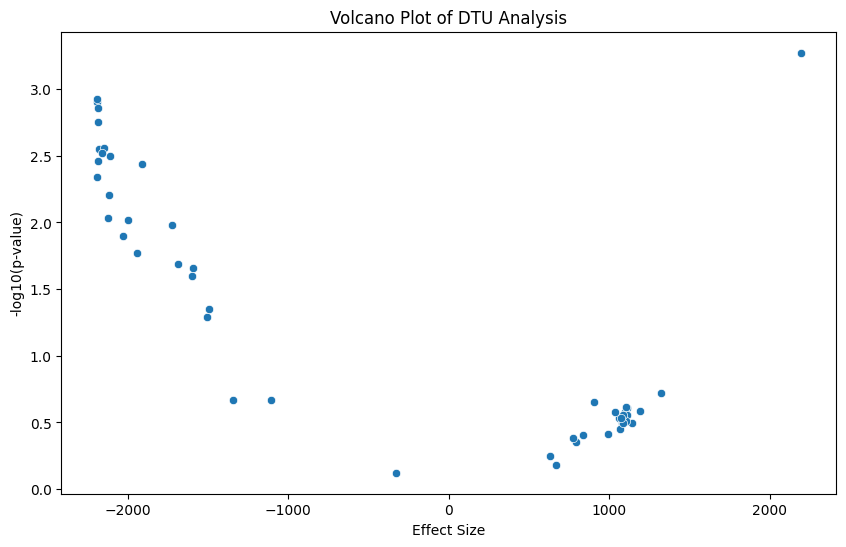

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.params, y=-np.log10(model.pvalues)>0.05)
plt.xlabel('Effect Size')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot of DTU Analysis')
plt.show()